In [ ]:
import numpy as np
import cv2 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Blank Image


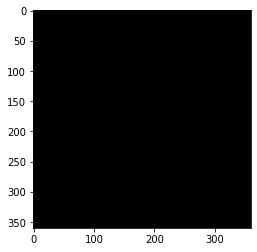

In [ ]:
IMG_DIMS = (360,360)
CENTER = (IMG_DIMS[0]//2, IMG_DIMS[1]//2)
RADIUS = 160

FOCAL_RADIUS =  120

GAUSSIAN_BLUR_KERNEL_SIZE = (5, 5)
GAUSSIAN_BLUR_SD = 10

WHITE = (255, 255, 255)

image = np.zeros(IMG_DIMS, dtype=np.uint8)

print("Blank Image")
plt.imshow(image, cmap='gray')

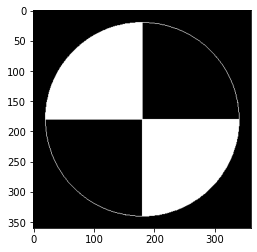

In [ ]:
# Draw Quadrants.
image = cv2.ellipse(image, CENTER, axes=(RADIUS, RADIUS), angle=0, startAngle=0, endAngle=90, color=WHITE)
image = cv2.ellipse(image, CENTER, axes=(RADIUS, RADIUS), angle=0, startAngle=90, endAngle=180, color=WHITE)
image = cv2.ellipse(image, CENTER, axes=(RADIUS, RADIUS), angle=0, startAngle=180, endAngle=270, color=WHITE)
image = cv2.ellipse(image, CENTER, axes=(RADIUS, RADIUS), angle=0, startAngle=270, endAngle=360, color=WHITE)


# Draw lines to seperate quadrants.
image = cv2.line(image, (IMG_DIMS[0]//2 - 160, IMG_DIMS[1]//2), (IMG_DIMS[0]//2 + 160, IMG_DIMS[1]//2), color=WHITE)
image = cv2.line(image, (IMG_DIMS[0]//2, IMG_DIMS[1]//2 - RADIUS), (IMG_DIMS[0]//2, IMG_DIMS[1]//2 + RADIUS), color=WHITE)

# Fill in colors.
cv2.floodFill(image, None, (IMG_DIMS[0]//2 - 80, IMG_DIMS[1]//2 - RADIUS//2), 255)
cv2.floodFill(image, None, (IMG_DIMS[0]//2 + 80, IMG_DIMS[1]//2 + RADIUS//2), 255)
plt.imshow(image, cmap='gray')

original_image = image.copy()

Region with focal radius : 120




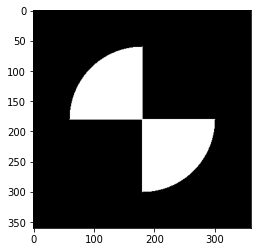

image with focal point at center initially


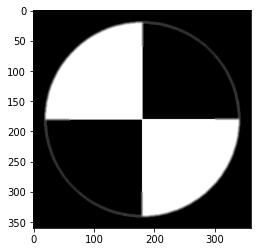

Variance map


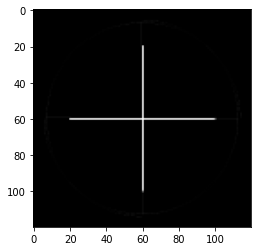

Edge map


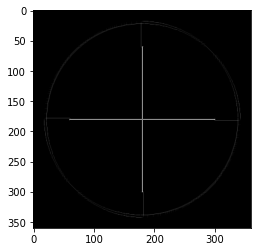

x mid 180.0
y mid 180.0


In [ ]:
image = original_image.copy()

blurred_image = cv2.GaussianBlur(image, GAUSSIAN_BLUR_KERNEL_SIZE, GAUSSIAN_BLUR_SD)

mask = np.zeros(IMG_DIMS, dtype=np.uint8)
non_blurred_region = cv2.circle(mask, CENTER, FOCAL_RADIUS, (255, 255, 255), -1)
non_blurred_region = cv2.bitwise_and(non_blurred_region, image)
print('Region with focal radius : ' + str(FOCAL_RADIUS) + '\n\n')
plt.imshow(non_blurred_region, cmap='gray')
plt.show()

blurred_image_copy = blurred_image.copy()
blurred_image_copy = cv2.circle(blurred_image_copy, CENTER, FOCAL_RADIUS, (0, 0, 0), -1)
image = blurred_image_copy +  non_blurred_region

print('image with focal point at center initially')
plt.imshow(image, cmap='gray')
plt.show()

laplacian_filter_4 = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
edge_mask = cv2.filter2D(image, -1, laplacian_filter_4)

variances = []
for x in range(1, IMG_DIMS[0]-1, 3):
    for y in range(1, IMG_DIMS[1]-1, 3):
        i = x
        j = y
        variances.append(np.var([edge_mask[i-1,j-1],
                                 edge_mask[i+0,j-1],
                                 edge_mask[i+1,j-1],
                                 edge_mask[i-1,j+0],
                                 edge_mask[i,j],
                                 edge_mask[i+1,j+0],
                                 edge_mask[i-1,j+1],
                                 edge_mask[i,j+1],
                                 edge_mask[i+1,j+1]]))

print('Variance map')
variance_image = np.array(variances).reshape(IMG_DIMS[0]//3, IMG_DIMS[1]//3)
plt.imshow(abs(variance_image), cmap='gray')
plt.show()

print('Edge map')
plt.imshow(edge_mask, cmap='gray')
plt.show()

original_edge_mask = edge_mask.copy()

if True:
        start_x = -1
        end_x = -1
        for i in range(0, IMG_DIMS[0]):
          k = IMG_DIMS[1] // 2
          if edge_mask[i, k] == 255:
            if start_x == -1:
              start_x = i
            else:
              end_x = i

        print('x mid', (start_x + end_x) / 2)

        start_y = -1
        end_y = -1
        for k in range(0, IMG_DIMS[0]):
          i = IMG_DIMS[0] // 2
          if edge_mask[i, k] == 255:
            if start_y == -1:
              start_y = k
            else:
              end_y = k

        print('y mid', (start_y + end_y) / 2)

0
NON Blurred region focal radius : 120




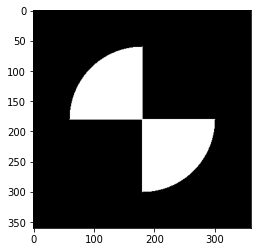

Test image with radius  120  being sharp with rest as blurred


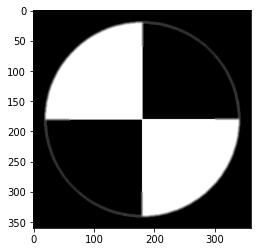

Laplacian mask


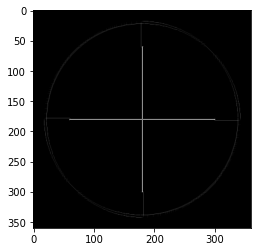

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
30
30
30
30
30
30
30
30
30
30
30
30
30
30


In [ ]:
angles = []
translations = []
angle_diff = []
translation_diff = []

for a in range(0, 360, 10):
    for m  in range(0,FOCAL_RADIUS):
        k = m
        #a = i
        i = a
        print(a)
        t = [int(k * np.cos(np.radians(i))), int(k * np.sin(np.radians(i)))]
        image = original_image.copy()
        
        # Move the focal point to a random position.
        new_focal_point = (CENTER[0]+t[0],CENTER[1]+t[1])
        blurred_image = cv2.GaussianBlur(image, GAUSSIAN_BLUR_KERNEL_SIZE, GAUSSIAN_BLUR_SD)
        mask = np.zeros(IMG_DIMS, dtype=np.uint8)
        non_blurred_region = cv2.circle(mask, new_focal_point, FOCAL_RADIUS, (255, 255, 255), -1)
        non_blurred_region = cv2.bitwise_and(non_blurred_region, image)


        blurred_image_copy = blurred_image.copy()
        blurred_image_copy = cv2.circle(blurred_image_copy, new_focal_point, FOCAL_RADIUS, (0, 0, 0), -1)
        test_image = blurred_image_copy +  non_blurred_region


        if i == 0 and k == 0:
          print('NON Blurred region focal radius : ' + str(FOCAL_RADIUS) + '\n\n')
          plt.imshow(non_blurred_region, cmap='gray')
          plt.show()

        if i == 0 and k == 0:
          print('Test image with radius ', FOCAL_RADIUS, ' being sharp with rest as blurred')
          plt.imshow(test_image, cmap='gray')
          plt.show()
        #print('difference in test image and filtered non blurred region (in circular fasion)')
        #plt.imshow(np.abs(test_image - non_blurred_region), cmap='gray')
        #plt.show()
        #print('Visualization of separation of non blurred and blurred parts (radius = fr)')
        test_image_copy = test_image.copy()
        #plt.imshow(cv2.circle(test_image_copy, new_focal_point, FOCAL_RADIUS, (255, 0, 0), 1), cmap='gray')
        #plt.show()

        # Perform laplacian of Gaussian.
        edge_mask = cv2.filter2D(test_image, -1, laplacian_filter_4)

        if i == 0 and k == 0:
          print('Laplacian mask')
          plt.imshow(edge_mask, cmap='gray')
          plt.show()

        # Start x is actually start y and vice versa.
        start_x = -1
        end_x = -1
        for i in range(0, IMG_DIMS[0]):
          k = IMG_DIMS[1] // 2
          if edge_mask[i, k] == 255:
            if start_x == -1:
              start_x = i
            else:
              end_x = i

        if i == 0:
          print('x mid', (start_x + end_x) / 2)
        y_mid = (start_x + end_x) / 2

        start_y = -1
        end_y = -1
        for k in range(0, IMG_DIMS[0]):
          i = IMG_DIMS[1] // 2
          if edge_mask[i, k] == 255:
            if start_y == -1:
              start_y = k
            else:
              end_y = k

        if i == 0 and k == 0:
          print('y mid', (start_y + end_y) / 2)
        x_mid = (start_y + end_y) / 2

        #print('Variance map of image with shifted focal point : ')
        #plt.imshow(test_image_variances, cmap='gray')
        #plt.show()

        #print('Absolute difference in variance maps')
        #plt.imshow((np.abs(test_image_variances - variance_image)), cmap='gray')
        #plt.show()

        if True:
            focal_point_position = [x_mid, y_mid]
            if i == 0 and k == 0:
              print("DETECTED FOCAL POINT : ", focal_point_position)
              print("ACTUAL FOCAL POINT  :" , CENTER)
              print('Predicted translation of focal point : ', focal_point_position[0] -  CENTER[0], focal_point_position[1] - CENTER[1])
              print('Actual translation : ', t)

            translation_diff.append([focal_point_position[0] - CENTER[0] - t[0], focal_point_position[1] - CENTER[1] - t[1]])
            angle_diff.append(np.arctan2((focal_point_position[1] - CENTER[1]), (focal_point_position[0] - CENTER[0])) -  np.arctan2((t[1]), (t[0])))
            translations.append(t)
            angles.append(a)


            test_variances = []
            comparison_index = 0
            for i in range(0, RADIUS, 1):
              if False:
                edge_mask = cv2.filter2D(test_image, -1, laplacian_filter_4)
                mask = np.zeros(IMG_DIMS, dtype=np.uint8)
                curr_radius_check_range = cv2.circle(mask, focal_point_position, i, (255, 255, 255), -1)
                curr_region_to_check = cv2.bitwise_and(edge_mask, curr_radius_check_range)
                test_var = curr_region_to_check.var()

                edge_mask = cv2.filter2D(image, -1, laplacian_filter_4)
                mask = np.zeros(IMG_DIMS, dtype=np.uint8)
                curr_radius_check_range = cv2.circle(mask, focal_point_position, i, (255, 255, 255), -1)
                curr_region_to_check = cv2.bitwise_and(edge_mask, curr_radius_check_range)

                var = curr_region_to_check.var()


                if var != test_var:
                    #print('BLUR DETECTED AT RADIUS : ', i-1)
                    #print('FOR VERIFICATION : CORRECT fr WAS AT RADIUS : ', FOCAL_RADIUS)

                    # Correction parameters:
                    #print('ANGLE CORRECTION DETECTED : ', np.arctan2((focal_point_position[1] - CENTER[1]), (focal_point_position[0] - CENTER[0])))
                    #print('ACTUAL ANGLE              : ', np.arctan2((t[1]), (t[0])))
 
                    
                    break
                comparison_index += 1

print('------------------------------------------------------\n\n\n\n\n\n\n\n\n\n\n\n')

In [ ]:
dict = {'angle diff': angle_diff, 'translation diff': translation_diff, 'translation' : translations, 'angle' : angles} 
    
df = pd.DataFrame(dict)


In [ ]:
from IPython.display import display
df.to_csv('focal_correction_new.xls')